# Symbolic regression of trigonometric function

In [1]:
import random

from pycgp.evolution import evolution
from pycgp.mutation import probabilistic_mutation
from pycgp.counter import Counter
from pycgp.benchmarks.symbolic import X, y, PARAMS, EV_PARAMS
from pycgp import Params, EvParams
import matplotlib.pyplot as plt
%matplotlib inline

Plot the data

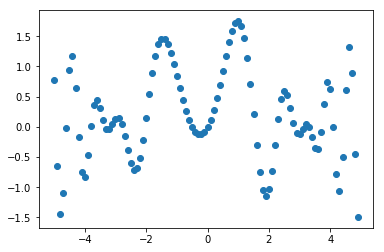

In [2]:
plt.scatter(X, y)

In [3]:
%%time

ev_params = EvParams(EV_PARAMS['cost_func'], target_fitness=0, mutation=probabilistic_mutation, max_evaluations=10000)
params = Params(1, 1, n_columns=23, funset=PARAMS['funset'])

random.seed(0)
result = evolution(params, ev_params, X, y)

CPU times: user 31.8 s, sys: 141 ms, total: 31.9 s
Wall time: 32.5 s


Pick the best individual

In [5]:
best = result['stats']['best']
print('Train error: {:.4f}'.format(best.fitness))

Train error: 0.0000


Show best individual and export image of graph into separate file.

In [6]:
from pycgp.visualize import to_graph

to_graph(best, 'symbolic-regression-best-individual')
print(best)

add(sin(add(x0,mul(x0,x0))),sin(mul(x0,x0)))


Visualization of best individual

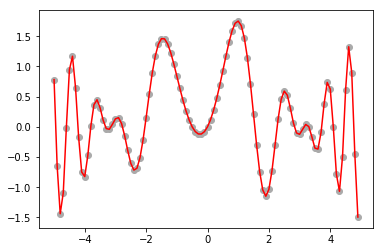

In [9]:
plt.scatter(X, y, c='#aaaaaa')
plt.plot(X, best.execute(X), c='red')

Mean fitness and best fitness of population from each generation during evolution. Note, that we need to clamp the y axis, since there are extreme outliers in population means.

(0, 1)

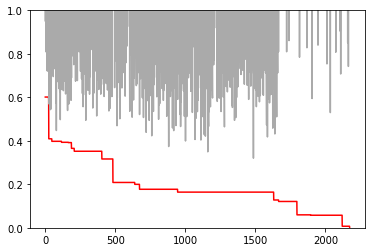

In [16]:
plt.plot([x.fitness for x in result['stats']['best_of_generation']], c='red', label='best')
plt.plot(result['stats']['mean_of_generation'], c='#aaaaaa', label='mean')
plt.ylim(0,1)

# Animation of evolution of best individual

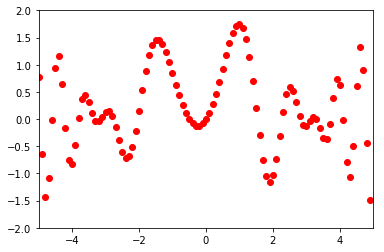

In [18]:
import numpy as np

import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML



fig, ax = plt.subplots()

ax.set_xlim((-5,5))
ax.set_ylim((-2,2))

line, = ax.plot([], [], lw=2)
ax.scatter(X, y, c='red')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    ind = result['stats']['best_of_generation'][i]
    ax.set_title('generation {}, fitness: {:2f}'.format(i, ind.fitness))
    y_pred = ind.execute(X)
    line.set_data(X, y_pred)
    return line,

n_frames = len(result['stats']['mean_of_generation'])

symanim = animation.FuncAnimation(fig, animate, init_func=init, frames=n_frames, interval=5, blit=True)

In [19]:
%%time
HTML(symanim.to_html5_video())

CPU times: user 3min 15s, sys: 1min 29s, total: 4min 44s
Wall time: 3min 30s


In [20]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, bitrate=1800)
symanim.save('symbolic regression evolution.mp4', writer=writer)